In [1]:
import pandas as pd

# Load the uploaded dataset
file_path = 'D:/Capstone-MS/model1.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,County,Postal_Code,County_name,State_Full_Name,Year,GeoFIPS,Poverty_Percent_ All_Ages,Median_Household_Income,POPESTIMATE,NPOPCHG,...,RDOMESTICMIG,RNETMIG,Employed,Unemployment_rate,AVG_INC_PERJOB,Establishments_per_capita,Payroll_per_capita,GDP_per_capita,GDP,Log_GDP_per_capita
0,"Autauga County, Alabama",AL,Autauga County,Alabama,2017,"""01001""",13.4,58343,55390,147,...,1.066590,0.849656,25224,4.0,37640,0.015689,6.516266,31.820870,1762558,3.460122
1,"Baldwin County, Alabama",AL,Baldwin County,Alabama,2017,"""01003""",10.1,56607,212521,4920,...,21.988851,22.398256,89286,4.2,36145,0.025334,9.822545,34.738016,7382558,3.547835
2,"Barbour County, Alabama",AL,Barbour County,Alabama,2017,"""01005""",33.4,32490,25157,-649,...,-25.469458,-24.998528,7914,6.0,38845,0.018086,9.423858,30.280280,761761,3.410497
3,"Bibb County, Alabama",AL,Bibb County,Alabama,2017,"""01007""",20.2,45795,22550,-36,...,-3.677774,-3.234669,8261,4.5,39639,0.012594,6.040621,18.037295,406741,2.892442
4,"Blount County, Alabama",AL,Blount County,Alabama,2017,"""01009""",12.8,48253,57787,293,...,6.210911,6.193562,23979,4.1,36760,0.012079,3.723883,17.096700,987967,2.838885


In [4]:
data.describe()

,Year,Poverty_Percent_ All_Ages,Median_Household_Income,POPESTIMATE,NPOPCHG,RBIRTH,RDEATH,RNATURALINC,RINTERNATIONALMIG,RDOMESTICMIG,RNETMIG,Employed,Unemployment_rate,AVG_INC_PERJOB,Establishments_per_capita,Payroll_per_capita,GDP_per_capita,GDP,Log_GDP_per_capita
count,17808.000000,17808.000000,17808.000000,1.780800e+04,17808.000000,17808.000000,17808.000000,17808.000000,17808.000000,17808.000000,17808.000000,1.780800e+04,17808.000000,17808.000000,17808.000000,17808.000000,17808.000000,1.780800e+04,17808.000000
mean,2019.500000,14.547125,56401.873035,1.041721e+05,411.273304,10.951839,11.771889,-0.820050,0.751994,1.540836,2.292830,4.881719e+04,4.568121,48537.036837,0.023111,12.159097,71.490697,6.413703e+06,3.700707
std,1.707873,5.752872,14841.529521,3.384258e+05,3604.549468,2.388327,3.403377,4.490913,1.544457,13.871106,13.750438,1.616450e+05,1.937125,13187.754675,0.009401,11.363132,1410.779296,2.928252e+07,0.530085
min,2017.000000,2.600000,22679.000000,5.100000e+01,-180394.000000,0.000000,0.000000,-24.000000,-2.847077,-432.890317,-422.666861,9.500000e+01,0.600000,15502.000000,0.003876,0.452769,9.175213,9.662000e+03,2.216506
25%,2018.000000,10.500000,46518.500000,1.069575e+04,-76.000000,9.508825,9.519099,-3.580677,0.000000,-5.406950,-4.640407,4.570000e+03,3.200000,40054.750000,0.017433,6.876073,29.370130,3.705382e+05,3.379978
50%,2019.500000,13.500000,54086.500000,2.541250e+04,7.000000,10.828889,11.558582,-0.834796,0.293455,0.746584,1.448594,1.081650e+04,4.200000,46736.000000,0.021679,10.394072,39.580417,9.640650e+05,3.678334
75%,2021.000000,17.400000,63351.250000,6.678050e+04,220.000000,12.144239,13.798963,1.828399,0.888931,8.073240,8.709828,2.941050e+04,5.400000,54852.000000,0.026923,15.000656,52.929788,2.803964e+06,3.968966
max,2022.000000,56.700000,167605.000000,1.010371e+07,83011.000000,30.103142,33.579769,25.002861,34.093286,152.000000,152.000000,4.917685e+06,22.600000,179841.000000,0.313725,852.117647,107455.526300,7.900164e+08,11.584832


In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Filter the data for the years needed for training, testing, and validation
train_data = data[data['Year'].between(2017, 2020)]
validation_data = data[data['Year'] == 2021]
test_data = data[data['Year'] == 2022]

# Select the features (independent variables) and target variable
X_train = train_data.drop(columns=['Log_GDP_per_capita', 'County', 'Postal_Code', 'County_name', 'State_Full_Name', 'GeoFIPS', 'GDP', 'GDP_per_capita'])
y_train = train_data['Log_GDP_per_capita']

X_val = validation_data.drop(columns=['Log_GDP_per_capita', 'County', 'Postal_Code', 'County_name', 'State_Full_Name', 'GeoFIPS',  'GDP', 'GDP_per_capita'])
y_val = validation_data['Log_GDP_per_capita']

X_test = test_data.drop(columns=['Log_GDP_per_capita', 'County', 'Postal_Code', 'County_name', 'State_Full_Name', 'GeoFIPS',  'GDP', 'GDP_per_capita'])
y_test = test_data['Log_GDP_per_capita']



In [155]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

Linear Regression

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


# Fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on test and validation data
y_val_pred = lr_model.predict(X_val_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Calculate performance metrics for test and validation sets
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)


test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)




lr_result = pd.DataFrame({
     "Validation RMSE": [val_rmse],
     "Validation R-squared": [val_r2],
     "Validation MAE": [val_mae],
     "Test RMSE": [test_rmse],
     "Test R-squared": [test_r2],
     "Test MAE": [test_mae]
})

In [157]:
lr_result

,Validation RMSE,Validation R-squared,Validation MAE,Test RMSE,Test R-squared,Test MAE
0,0.332183,0.612354,0.197497,0.387968,0.467333,0.226518


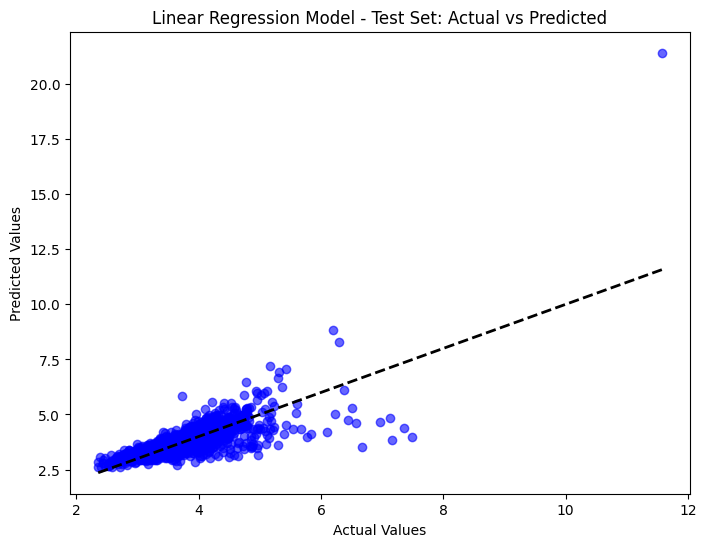

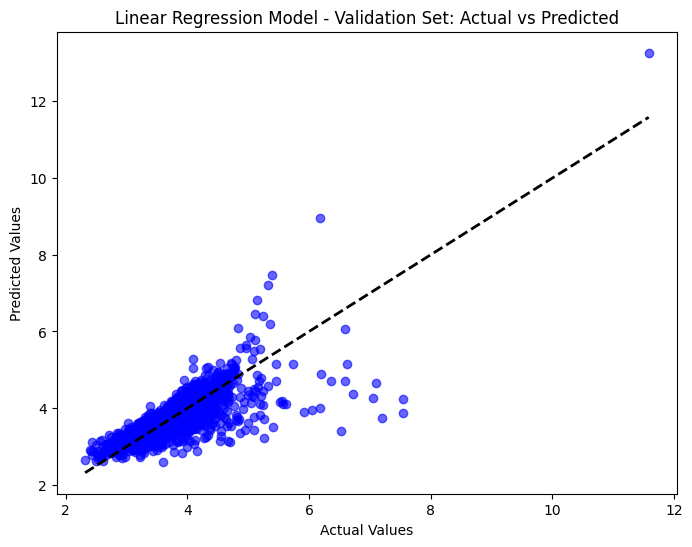

In [158]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted for Linear Regression - Test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Model - Test Set: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # reference line y=x
plt.show()

# Plot Actual vs Predicted for Linear Regression - Validation set
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Model - Validation Set: Actual vs Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)  # reference line y=x
plt.show()


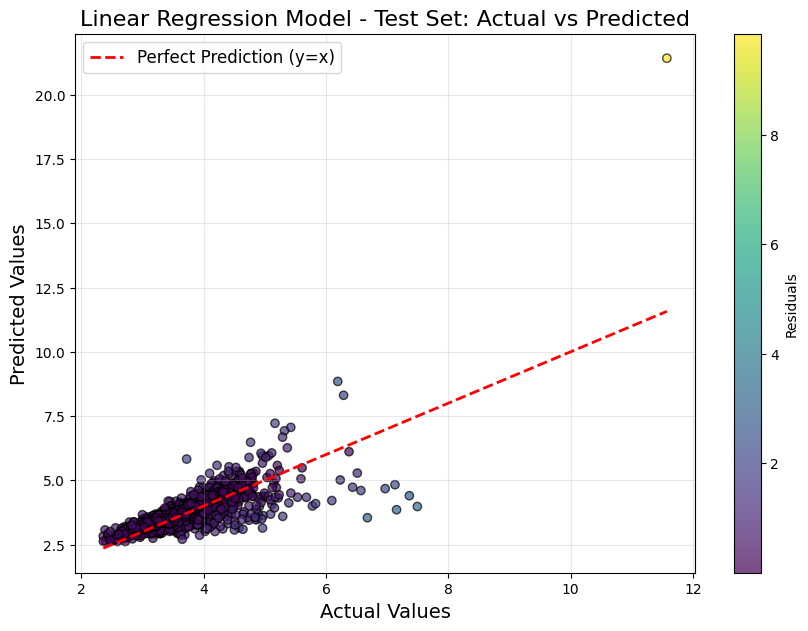

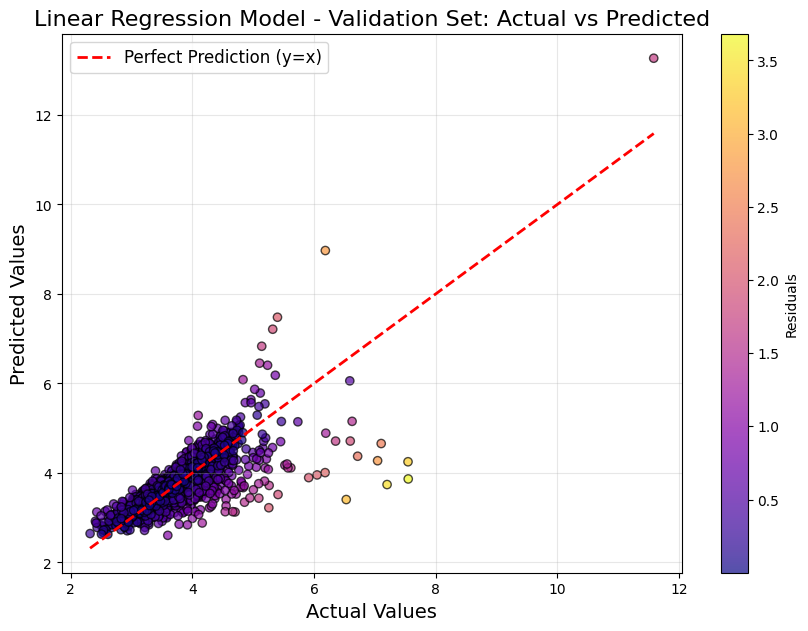

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# Define residuals for coloring
residuals_test = np.abs(y_test - y_test_pred)
residuals_val = np.abs(y_val - y_val_pred)

# Improved plot for Test Set
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_test, y_test_pred, c=residuals_test, cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='Residuals')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label="Perfect Prediction (y=x)")
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Linear Regression Model - Test Set: Actual vs Predicted", fontsize=16)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

# Improved plot for Validation Set
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_val, y_val_pred, c=residuals_val, cmap='plasma', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='Residuals')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', linewidth=2, label="Perfect Prediction (y=x)")
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Linear Regression Model - Validation Set: Actual vs Predicted", fontsize=16)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


PLS

In [130]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the Partial Least Squares (PLS) model
pls_model = PLSRegression(n_components=10)

# Train the PLS model on the scaled training data
pls_model.fit(X_train_scaled, y_train)

# Predict on the test and validation sets
pls_pred_test = pls_model.predict(X_test_scaled).ravel()
pls_pred_validate = pls_model.predict(X_val_scaled).ravel()

# Calculate performance metrics for the PLS model
pls_rmse_test = mean_squared_error(y_test, pls_pred_test, squared=False)
pls_r2_test = r2_score(y_test, pls_pred_test)
pls_mae_test = mean_absolute_error(y_test, pls_pred_test)

pls_rmse_validate = mean_squared_error(y_val, pls_pred_validate, squared=False)
pls_r2_validate = r2_score(y_val, pls_pred_validate)
pls_mae_validate = mean_absolute_error(y_val, pls_pred_validate)

# Display PLS model performance results
pls_results_df = pd.DataFrame({
    "Model": ["Partial Least Squares (PLS)"],
    "Validation RMSE": [pls_rmse_validate],
    "Validation R2": [pls_r2_validate],
    "Validation MAE": [pls_mae_validate],
    "Test RMSE": [pls_rmse_test],
    "Test R2": [pls_r2_test],
    "Test MAE": [pls_mae_test]
})

print(pls_results_df)


                         Model  Validation RMSE  Validation R2  \
0  Partial Least Squares (PLS)          0.33234       0.611988   

   Validation MAE  Test RMSE   Test R2  Test MAE  
0        0.196599   0.381848  0.484006  0.222143  


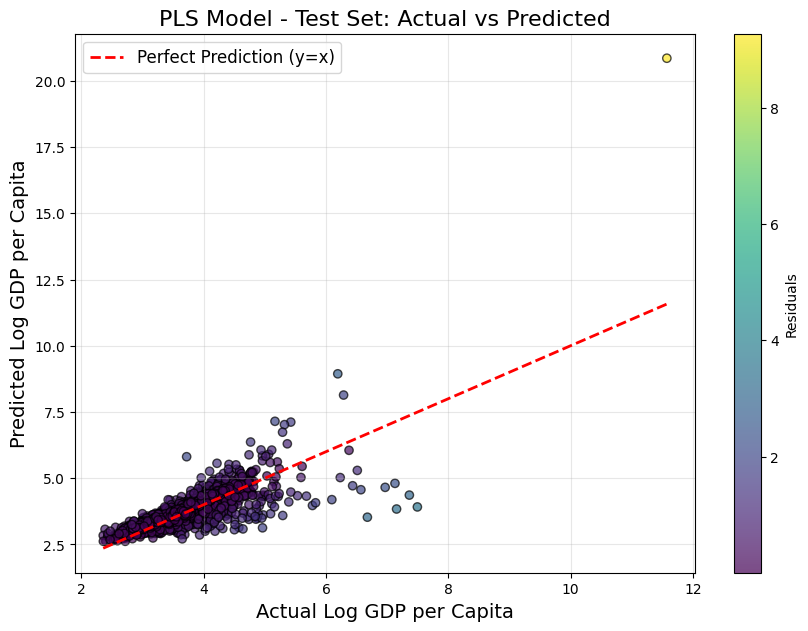

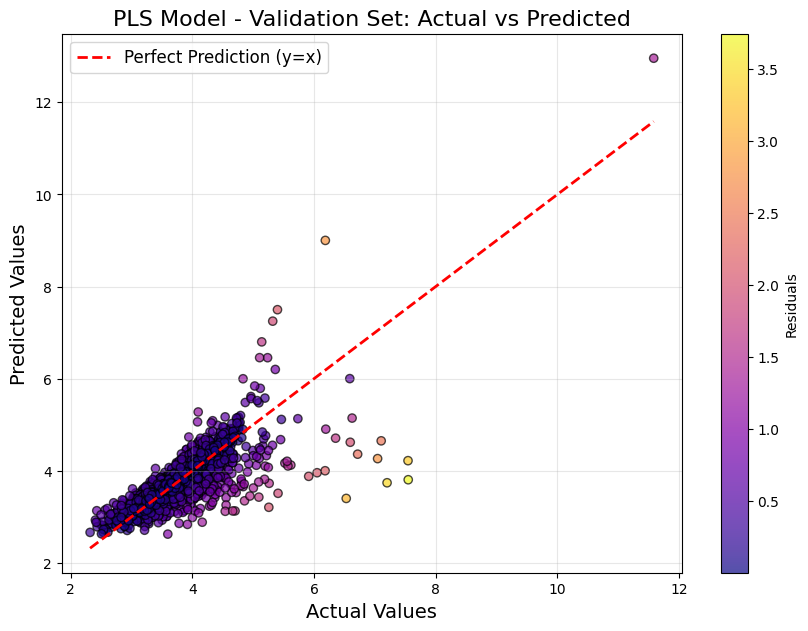

In [161]:
import matplotlib.pyplot as plt
import numpy as np

# Residuals for Test and Validation Sets
residuals_test_pls = np.abs(y_test - pls_pred_test)
residuals_val_pls = np.abs(y_val - pls_pred_validate)

# Plot for Test Set
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_test, pls_pred_test, c=residuals_test_pls, cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='Residuals')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction (y=x)")
plt.xlabel("Actual Log GDP per Capita", fontsize=14)
plt.ylabel("Predicted Log GDP per Capita", fontsize=14)
plt.title("PLS Model - Test Set: Actual vs Predicted", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plot for Validation Set
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_val, pls_pred_validate, c=residuals_val_pls, cmap='plasma', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='Residuals')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label="Perfect Prediction (y=x)")
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("PLS Model - Validation Set: Actual vs Predicted", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


GBM

In [132]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting model
gbm_model = GradientBoostingRegressor()

# Train the Gradient Boosting model on the scaled training data
gbm_model.fit(X_train_scaled, y_train)

# Predict on test and validation sets
gbm_pred_test = gbm_model.predict(X_test_scaled)
gbm_pred_validate = gbm_model.predict(X_val_scaled)

# Calculate performance metrics for the Gradient Boosting model
gbm_rmse_test = mean_squared_error(y_test, gbm_pred_test, squared=False)
gbm_r2_test = r2_score(y_test, gbm_pred_test)
gbm_mae_test = mean_absolute_error(y_test, gbm_pred_test)

gbm_rmse_validate = mean_squared_error(y_val, gbm_pred_validate, squared=False)
gbm_r2_validate = r2_score(y_val, gbm_pred_validate)
gbm_mae_validate = mean_absolute_error(y_val, gbm_pred_validate)

# Display Gradient Boosting model performance results
gbm_results_df = pd.DataFrame({
    "Model": ["Gradient Boosting"],
    "Validation RMSE": [gbm_rmse_validate],
    "Validation R2": [gbm_r2_validate],
    "Validation MAE": [gbm_mae_validate],
    "Test RMSE": [gbm_rmse_test],
    "Test R2": [gbm_r2_test],
    "Test MAE": [gbm_mae_test]
})

print(gbm_results_df)


               Model  Validation RMSE  Validation R2  Validation MAE  \
0  Gradient Boosting         0.276304       0.731803        0.181825   

   Test RMSE   Test R2  Test MAE  
0   0.307445  0.665498  0.226192  


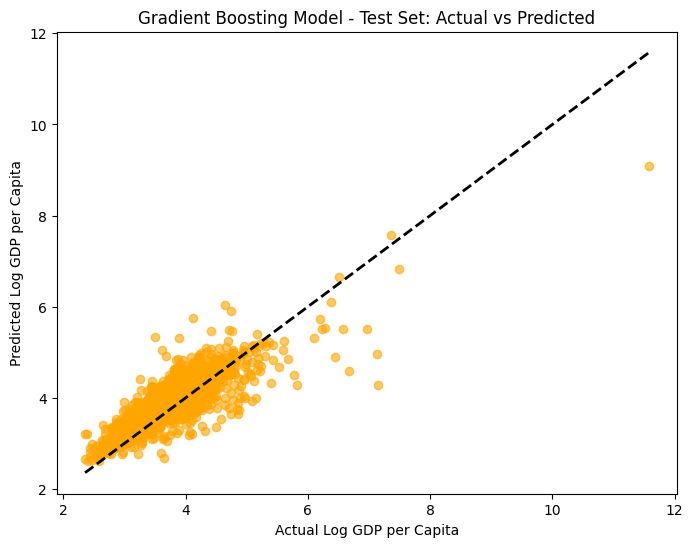

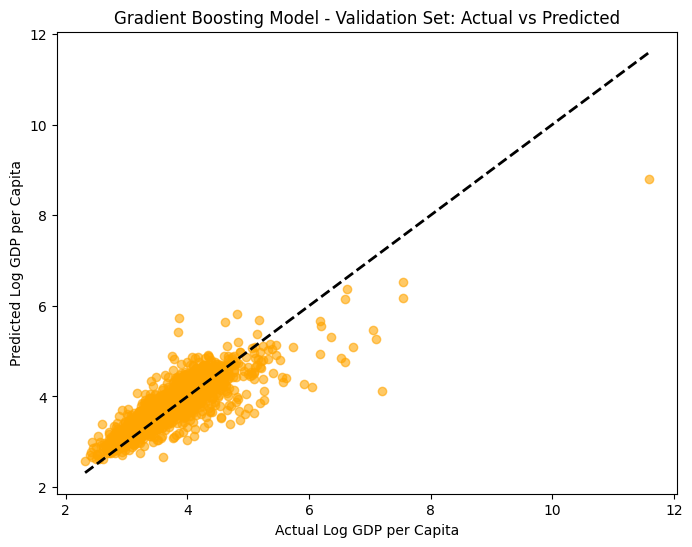

In [133]:
# Plot Actual vs Predicted for Gradient Boosting - Test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gbm_pred_test, alpha=0.6, color='orange')
plt.xlabel("Actual Log GDP per Capita")
plt.ylabel("Predicted Log GDP per Capita")
plt.title("Gradient Boosting Model - Test Set: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # reference line y=x
plt.show()

# Plot Actual vs Predicted for Gradient Boosting - Validation set
plt.figure(figsize=(8, 6))
plt.scatter(y_val, gbm_pred_validate, alpha=0.6, color='orange')
plt.xlabel("Actual Log GDP per Capita")
plt.ylabel("Predicted Log GDP per Capita")
plt.title("Gradient Boosting Model - Validation Set: Actual vs Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)  # reference line y=x
plt.show()


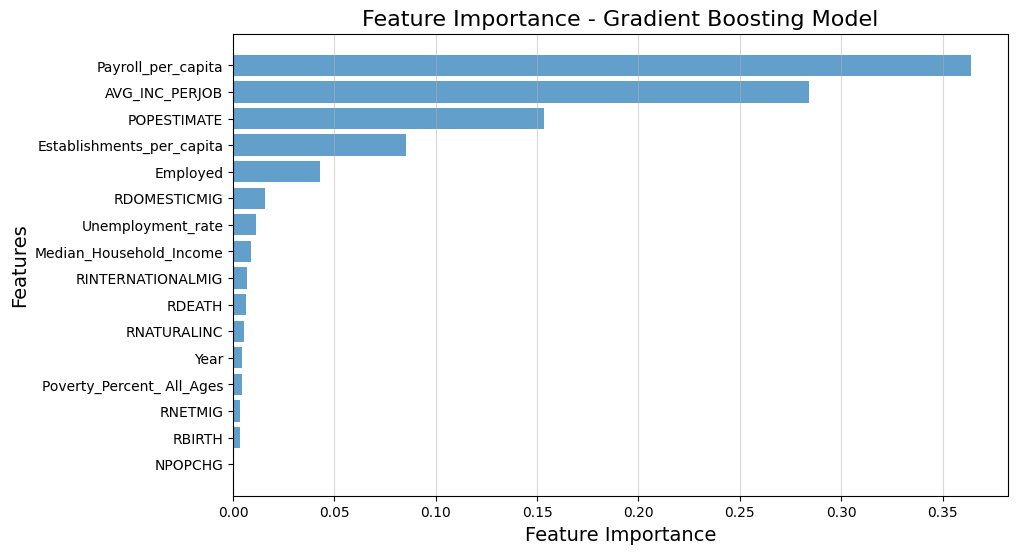

In [170]:
# Extract feature importance from the Gradient Boosting model
feature_importances = best_gbm_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], alpha=0.7)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance - Gradient Boosting Model", fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.grid(axis="x", alpha=0.5)
plt.show()



In [134]:
gbm_results_df

,Model,Validation RMSE,Validation R2,Validation MAE,Test RMSE,Test R2,Test MAE
0,Gradient Boosting,0.276304,0.731803,0.181825,0.307445,0.665498,0.226192


GBM Paramenter Tunned


In [135]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid for random search
param_distributions = {
    "n_estimators": [50, 100, 200, 300, 500],
    "learning_rate": np.linspace(0.01, 0.2, 10),
    "max_depth": [3, 4, 5, 6, 7],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "subsample": np.linspace(0.6, 1.0, 5),
    "max_features": ['auto', 'sqrt', 'log2']
}

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(),
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_mean_squared_error',  # Negative MSE to maximize performance
    cv=5,  # Number of cross-validation folds
    verbose=2,  # Show progress
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train_scaled, y_train)

# Best hyperparameters from RandomizedSearchCV
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Best model from RandomizedSearchCV
best_gbm_model = random_search.best_estimator_

# Predict on test and validation sets using the tuned model
tuned_gbm_pred_test = best_gbm_model.predict(X_test_scaled)
tuned_gbm_pred_validate = best_gbm_model.predict(X_val_scaled)

# Calculate performance metrics for the tuned Gradient Boosting model
tuned_gbm_rmse_test = mean_squared_error(y_test, tuned_gbm_pred_test, squared=False)
tuned_gbm_r2_test = r2_score(y_test, tuned_gbm_pred_test)
tuned_gbm_rmse_validate = mean_squared_error(y_val, tuned_gbm_pred_validate, squared=False)
tuned_gbm_r2_validate = r2_score(y_val, tuned_gbm_pred_validate)

# Display tuned Gradient Boosting model performance results
tuned_gbm_results_df = pd.DataFrame({
    "Model": ["Tuned Gradient Boosting"],
    "Validation RMSE": [tuned_gbm_rmse_validate],
    "Validation R2": [tuned_gbm_r2_validate],
    "Test RMSE": [tuned_gbm_rmse_test],
    "Test R2": [tuned_gbm_r2_test],
})
print(tuned_gbm_results_df)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\sushr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sushr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sushr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\sushr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

Best Parameters: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.11555555555555555}
                     Model  Validation RMSE  Validation R2  Test RMSE  \
0  Tuned Gradient Boosting         0.256371       0.769103   0.322836   

    Test R2  
0  0.631169  


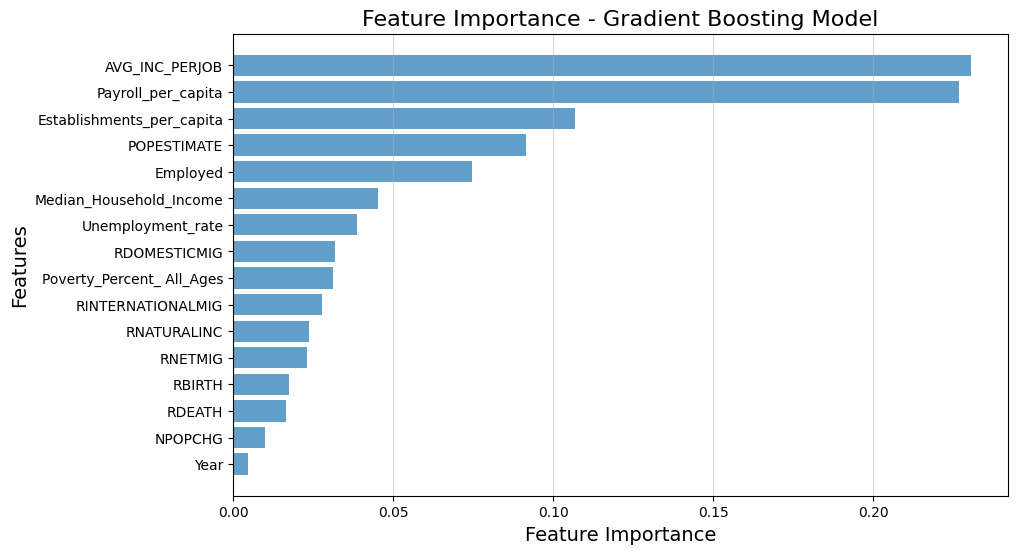

In [171]:
# Extract feature importance from the Gradient Boosting model
feature_importances = best_gbm_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], alpha=0.7)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance - Gradient Boosting Model", fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.grid(axis="x", alpha=0.5)
plt.show()



In [148]:
tuned_gbm_mae_validate = mean_absolute_error(y_val, tuned_gbm_pred_validate)

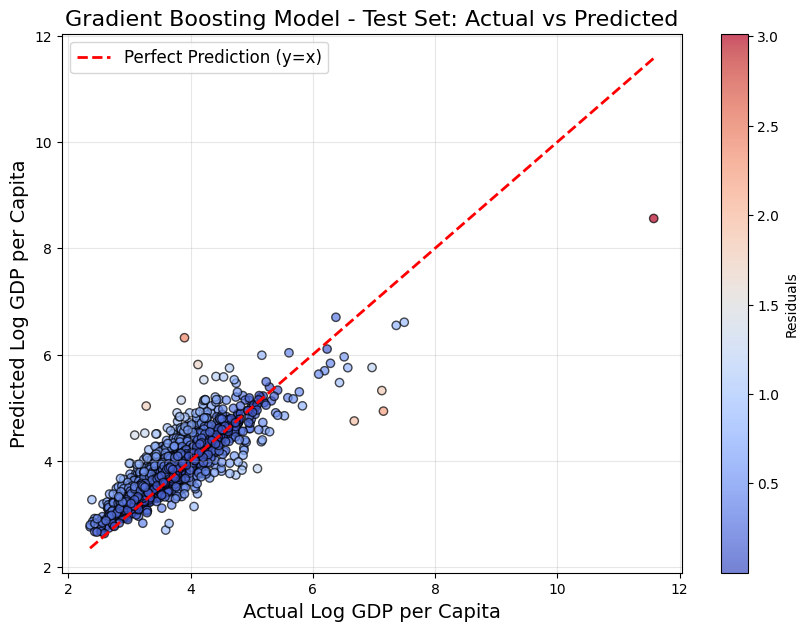

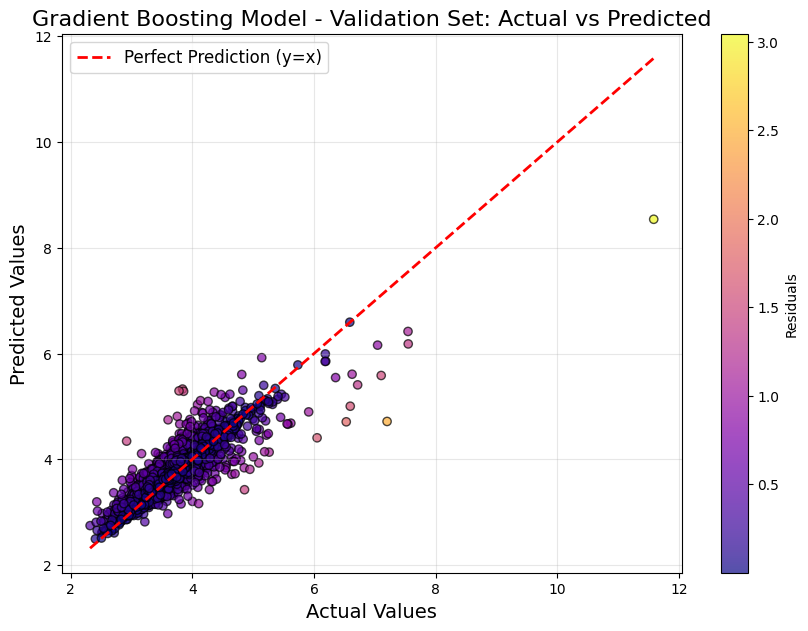

In [164]:
import matplotlib.pyplot as plt
import numpy as np

# Residuals for Test and Validation Sets
residuals_test_gbm = np.abs(y_test - tuned_gbm_pred_test)
residuals_val_gbm = np.abs(y_val - tuned_gbm_pred_validate)

# Plot for Test Set
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_test, tuned_gbm_pred_test, c=residuals_test_gbm, cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='Residuals')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction (y=x)")
plt.xlabel("Actual Log GDP per Capita", fontsize=14)
plt.ylabel("Predicted Log GDP per Capita", fontsize=14)
plt.title("Gradient Boosting Model - Test Set: Actual vs Predicted", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plot for Validation Set
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_val, tuned_gbm_pred_validate, c=residuals_val_gbm, cmap='plasma', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='Residuals')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label="Perfect Prediction (y=x)")
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Gradient Boosting Model - Validation Set: Actual vs Predicted", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


SVM

In [138]:
# Importing necessary modules for plotting and calculations
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the Support Vector Regression model with the 'linear' kernel
svm = SVR()

# Train the SVM model on the training data
model_svm = svm.fit(X_train_scaled, y_train)

# Predict on test and validation sets
svm_pred_test = model_svm.predict(X_test_scaled)
svm_pred_validate = model_svm.predict(X_val_scaled)

# Calculate performance metrics for the SVM model
svm_rmse_test = mean_squared_error(y_test, svm_pred_test, squared=False)
svm_r2_test = r2_score(y_test, svm_pred_test)
svm_mae_test = mean_absolute_error(y_test, svm_pred_test)

svm_rmse_validate = mean_squared_error(y_val, svm_pred_validate, squared=False)
svm_r2_validate = r2_score(y_val, svm_pred_validate)
svm_mae_validate = mean_absolute_error(y_val, svm_pred_validate)

# Display SVM model performance results
svm_results_df = pd.DataFrame({
    "Model": ["Support Vector Machines"],
    "Validation RMSE": [svm_rmse_validate],
    "Validation R2": [svm_r2_validate],
    "Validation MAE": [svm_mae_validate],
    "Test RMSE": [svm_rmse_test],
    "Test R2": [svm_r2_test],
    "Test MAE": [svm_mae_test],
})

print(svm_results_df)


                     Model  Validation RMSE  Validation R2  Validation MAE  \
0  Support Vector Machines         0.353765       0.560346         0.21323   

   Test RMSE   Test R2  Test MAE  
0   0.417847  0.382128  0.311067  


In [139]:
svm_results_df

,Model,Validation RMSE,Validation R2,Validation MAE,Test RMSE,Test R2,Test MAE
0,Support Vector Machines,0.353765,0.560346,0.21323,0.417847,0.382128,0.311067


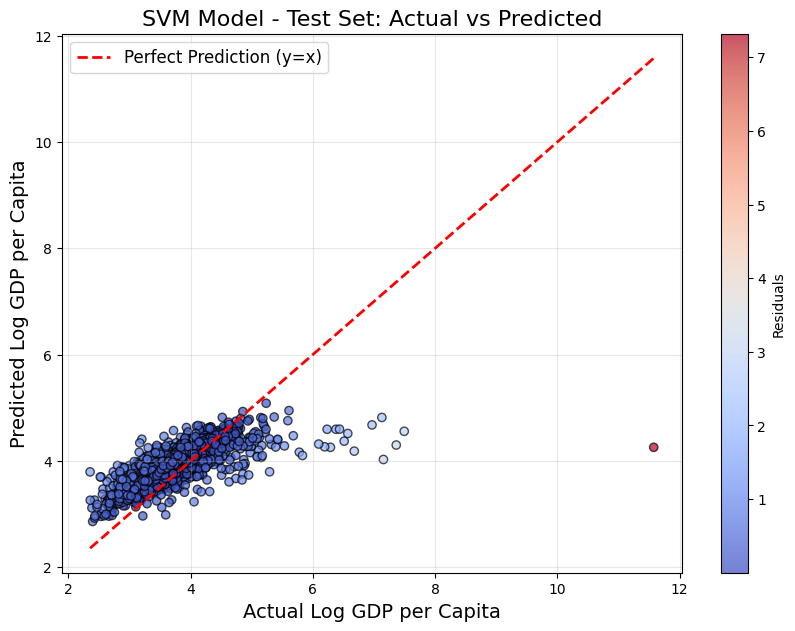

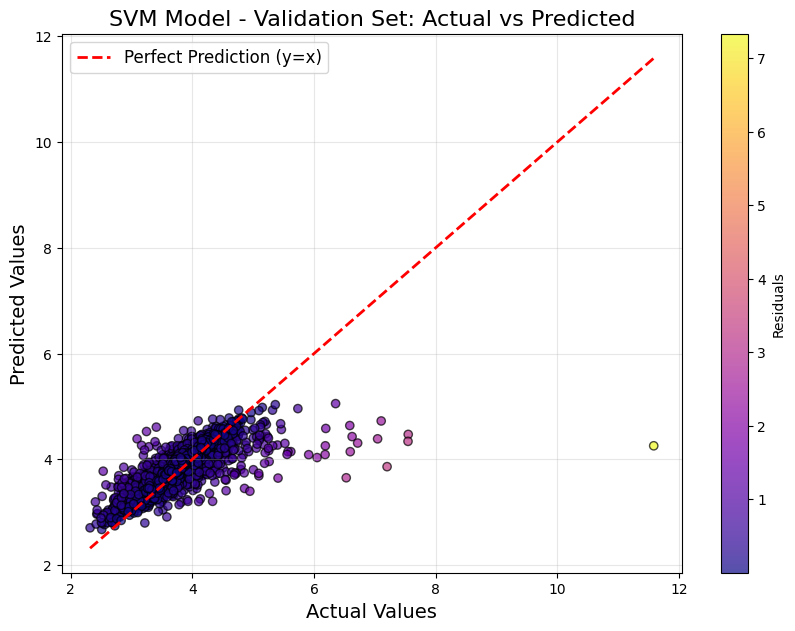

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Residuals for Test and Validation Sets
residuals_test_svm = np.abs(y_test - svm_pred_test)
residuals_val_svm = np.abs(y_val - svm_pred_validate)

# Plot for Test Set
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_test, svm_pred_test, c=residuals_test_svm, cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='Residuals')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction (y=x)")
plt.xlabel("Actual Log GDP per Capita", fontsize=14)
plt.ylabel("Predicted Log GDP per Capita", fontsize=14)
plt.title("SVM Model - Test Set: Actual vs Predicted", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plot for Validation Set
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_val, svm_pred_validate, c=residuals_val_svm, cmap='plasma', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='Residuals')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label="Perfect Prediction (y=x)")
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("SVM Model - Validation Set: Actual vs Predicted", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [141]:
svm_results_df

,Model,Validation RMSE,Validation R2,Validation MAE,Test RMSE,Test R2,Test MAE
0,Support Vector Machines,0.353765,0.560346,0.21323,0.417847,0.382128,0.311067


Feature Importance

In [36]:
target_column = "Log_GDP_per_capita"

features = data.drop(columns=['Log_GDP_per_capita', 'County', 'Postal_Code', 'County_name', 'State_Full_Name', 'GeoFIPS', 'GDP', 'GDP_per_capita'])

features = features.fillna(features.mean())

target = data[target_column]


In [37]:
feature_names = features.columns

gbm_importances = gbm_model.feature_importances_
lr_importances = np.abs(lr_model.coef_)
pls_importances = np.abs(pls_model.coef_).ravel()
importances = {

    "Feature": feature_names,

    "Gradient Boosting": gbm_importances,

    "Linear Regression": lr_importances,

    "PLS Regression": pls_importances,


}

importance_df = pd.DataFrame(importances)



# Calculate averages and rankings

importance_df["Average Importance"] = importance_df.iloc[:, 1:].mean(axis=1)

importance_df["Count in Top 10"] = importance_df.iloc[:, 1:].apply(

    lambda row: sum(row >= sorted(row, reverse=True)[:10][-1]), axis=1

)


In [38]:
importance_df

,Feature,Gradient Boosting,Linear Regression,PLS Regression,Average Importance,Count in Top 10
0,Year,0.004423,1.174731e-02,0.010589,8.919634e-03,4
1,Poverty_Percent_ All_Ages,0.004327,6.085894e-02,0.065913,4.369972e-02,4
2,Median_Household_Income,0.008677,9.090732e-02,0.100596,6.672669e-02,4
3,POPESTIMATE,0.143561,3.086782e-01,0.000008,1.507490e-01,4
4,NPOPCHG,0.000873,1.410181e-03,0.000886,1.056523e-03,4
5,RBIRTH,0.003367,1.991041e+06,0.007693,6.636804e+05,4
6,RDEATH,0.011364,2.297551e+06,0.026759,7.658503e+05,4
7,RNATURALINC,0.005672,3.352963e+06,0.022904,1.117654e+06,4
8,RINTERNATIONALMIG,0.006773,1.987280e+06,0.018664,6.624268e+05,4
9,RDOMESTICMIG,0.011989,1.660130e+07,0.008379,5.533767e+06,4


Random Forest

In [175]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the Random Forest and Decision Tree models
rf_model = RandomForestRegressor(random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train_scaled, y_train)



# Predict on test and validation sets for Random Forest
rf_pred_test = rf_model.predict(X_test_scaled)
rf_pred_validate = rf_model.predict(X_val_scaled)


# Calculate performance metrics for Random Forest
rf_rmse_test = mean_squared_error(y_test, rf_pred_test, squared=False)
rf_r2_test = r2_score(y_test, rf_pred_test)
rf_mae_test = mean_absolute_error(y_test, rf_pred_test)

rf_rmse_validate = mean_squared_error(y_val, rf_pred_validate, squared=False)
rf_r2_validate = r2_score(y_val, rf_pred_validate)
rf_mae_validate = mean_absolute_error(y_val, rf_pred_validate)

# Combine the results
rf_results_df = pd.DataFrame({
    "Model": ["Random Forest"],
    "Validation RMSE": [rf_rmse_validate],
    "Validation R2": [rf_r2_validate],
    "Validation MAE": [rf_mae_test],
    "Test RMSE": [rf_rmse_test],
    "Test R2": [rf_r2_test],
    "Test MAE" : [rf_mae_validate]
})


In [176]:
rf_results_df

,Model,Validation RMSE,Validation R2,Validation MAE,Test RMSE,Test R2,Test MAE
0,Random Forest,0.260688,0.761262,0.234557,0.316573,0.64534,0.173094


In [144]:
rf_mae_validate = mean_absolute_error(y_val, rf_pred_validate)


In [145]:
rf_mae_validate

0.173094473010401

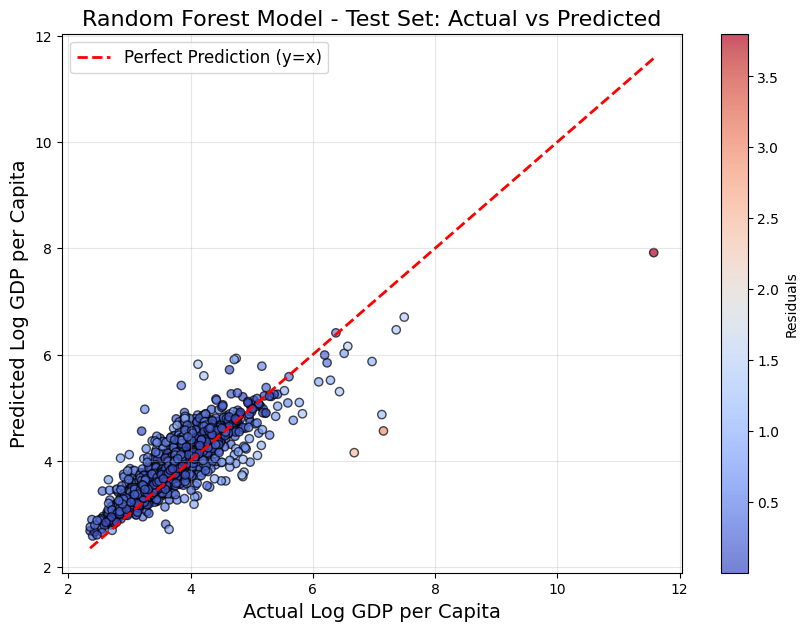

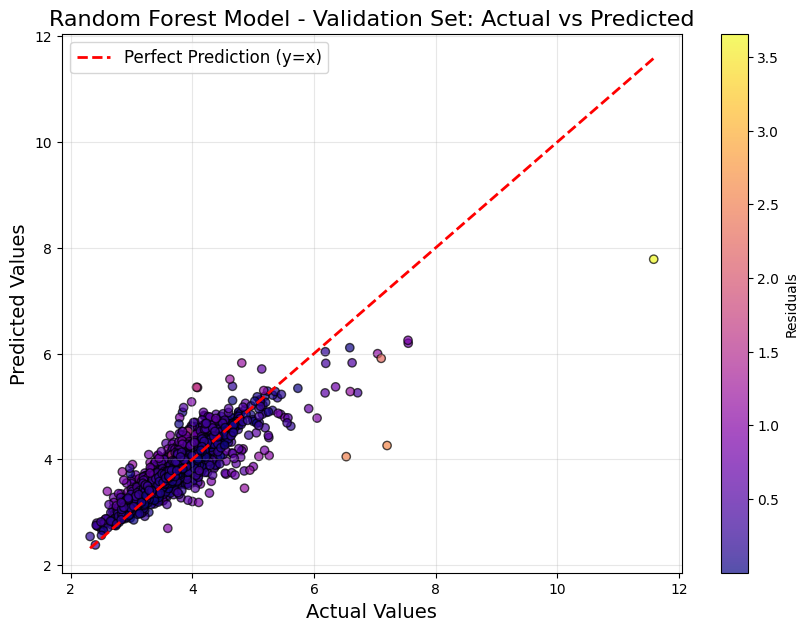

In [168]:
import matplotlib.pyplot as plt
import numpy as np

# Residuals for Test and Validation Sets
residuals_test_rf = np.abs(y_test - rf_pred_test)
residuals_val_rf = np.abs(y_val - rf_pred_validate)

# Plot for Test Set
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_test, rf_pred_test, c=residuals_val_rf, cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='Residuals')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction (y=x)")
plt.xlabel("Actual Log GDP per Capita", fontsize=14)
plt.ylabel("Predicted Log GDP per Capita", fontsize=14)
plt.title("Random Forest Model - Test Set: Actual vs Predicted", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plot for Validation Set
plt.figure(figsize=(10, 7))
scatter = plt.scatter(y_val, rf_pred_validate, c=residuals_test_rf, cmap='plasma', alpha=0.7, edgecolor='k')
plt.colorbar(scatter, label='Residuals')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label="Perfect Prediction (y=x)")
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Random Forest Model - Validation Set: Actual vs Predicted", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


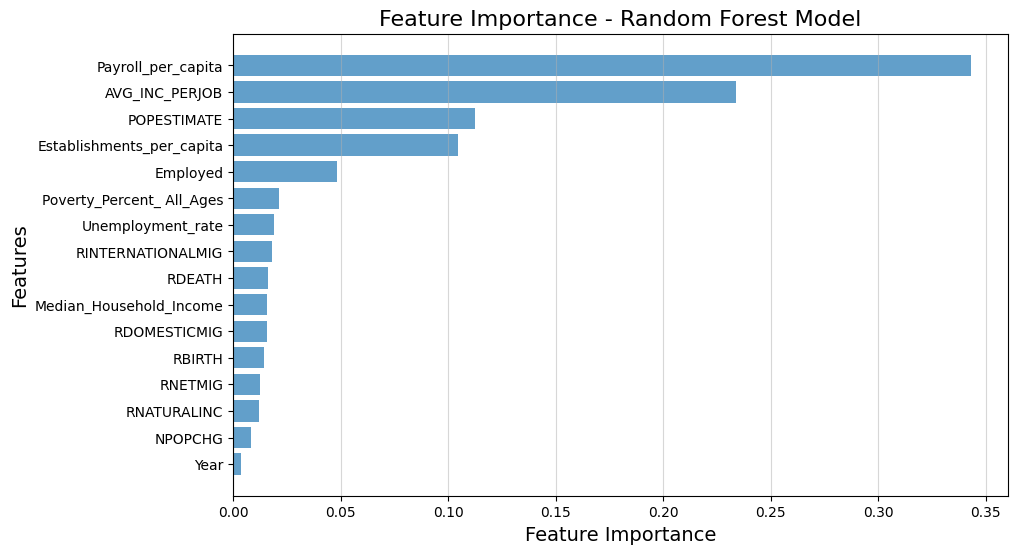

In [177]:
# Extract feature importance from the Gradient Boosting model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], alpha=0.7)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance - Random Forest Model", fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.grid(axis="x", alpha=0.5)
plt.show()



Tuned Random Forest

In [151]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

from sklearn.model_selection import RandomizedSearchCV

# Setting up the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initializing the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Using RandomizedSearchCV for hyperparameter tuning with cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_dist, 
    n_iter=20,  # Number of random combinations to try
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)

# Fitting the RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Extracting the best model and parameters
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_

# Predicting on the validation set with the best model
y_pred_val = best_rf_model.predict(X_val_scaled)

# Calculating the evaluation metrics for the optimized model
mae = mean_absolute_error(y_test, y_pred_val)
mse = mean_squared_error(y_test, y_pred_val)
rmse = mse**0.5
r_squared = r2_score(y_test, y_pred_val)

best_params, mae, mse, rmse, r_squared




Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\sushr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sushr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sushr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\sushr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p

({'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 30},
 0.1792664501871532,
 0.07255392786844153,
 0.2693583632791852,
 0.7432416303052864)

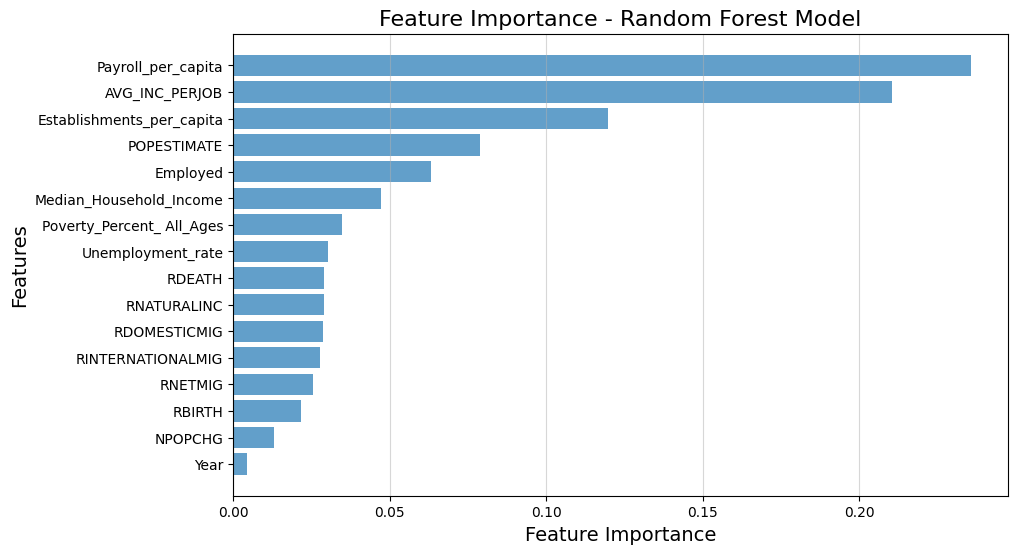

In [174]:
# Extract feature importance from the Gradient Boosting model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], alpha=0.7)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance - Random Forest Model", fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.grid(axis="x", alpha=0.5)
plt.show()



Validation Set Results


In [149]:
# DataFrames for each model

lr_result_val = pd.DataFrame({

    "Model": ["Linear Regression"],

    "Validation RMSE": [val_rmse],

    "Validation R2": [val_r2],

    "Validation MAE": [val_mae]

})

pls_results_df_val = pd.DataFrame({

    "Model": ["Partial Least Squares (PLS)"],

    "Validation RMSE": [pls_rmse_validate],

    "Validation R2": [pls_r2_validate],

    "Validation MAE": [pls_mae_validate]
})

gbm_results_df_val_tune = pd.DataFrame({

    "Model": ["Gradient Boosting"],

    "Validation RMSE": [tuned_gbm_rmse_validate],

    "Validation R2": [tuned_gbm_r2_validate],

    "Validation MAE": [tuned_gbm_mae_validate]

})

svm_results_df_val = pd.DataFrame({

    "Model": ["Support Vector Machines"],

    "Validation RMSE": [svm_rmse_validate],

    "Validation R2": [svm_r2_validate],

    "Validation MAE": [svm_mae_validate]

})

rf_results_df_val = pd.DataFrame({

    "Model": ["Random Forest"],

    "Validation RMSE": [rf_rmse_validate],

    "Validation R2": [rf_r2_validate],

    "Validation MAE" : [rf_mae_validate]

})



# Combine all results into a single DataFrame for comparison

validation_results_df = pd.concat([

    lr_result_val,

    pls_results_df_val,

    gbm_results_df_val_tune,

    svm_results_df_val,

    rf_results_df_val

], ignore_index=True)




In [150]:
validation_results_df

,Model,Validation RMSE,Validation R2,Validation MAE
0,Linear Regression,0.332183,0.612354,0.197497
1,Partial Least Squares (PLS),0.332340,0.611988,0.196599
2,Gradient Boosting,0.256371,0.769103,0.168989
3,Support Vector Machines,0.353765,0.560346,0.213230
4,Random Forest,0.260688,0.761262,0.173094
